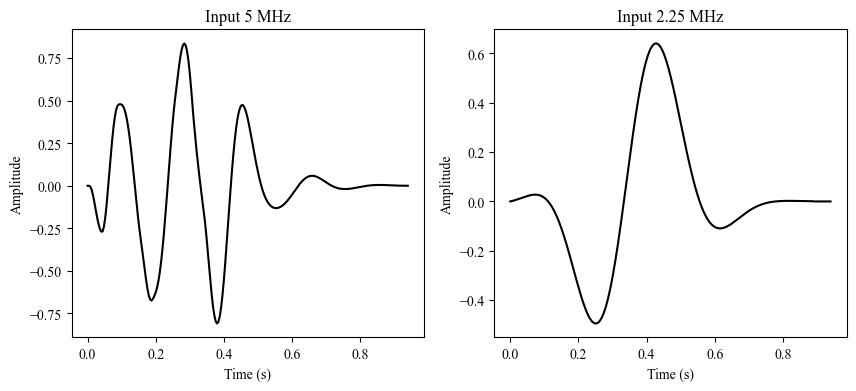

In [1]:
import matplotlib.pyplot as plt
import json
from scipy import interpolate
import numpy as np

def input_f(dt, input_plot):
    f = open('signal.json')
    data = json.load(f)
    amplitude = data['amplitude']
    time = data['time']
    time = [i*1000000 for i in time]
    
    def function(x):
        f = 2.25
        graph_time = 2/f       
        input = np.zeros(len(x))
        for i in range(len(x)):
            if x[i]<=graph_time:
                #input[i] = np.sin(2.25*np.pi*x[i])
                input[i] = f *x[i] * np.exp(-(2 * np.pi * f *x[i] / 3 - 1.4)**2) * np.cos(2 * np.pi * f * x[i])
            else:
                input[i] = 0
        return input
    
    #function = interpolate.interp1d(time, amplitude)
    lowest = np.amin(time)
    highest = np.amax(time)
    new_time = np.arange(lowest, highest, dt)
    new_amplitude = function(new_time)  # use interpolation function returned by `interp1d`
    if input_plot:
        plt.rcParams["font.family"] = "Times New Roman"
        fig, axs = plt.subplots(1, 2, figsize=(10,4))
        # Plotting on the first subplot
        axs[0].plot(time, amplitude, linestyle='-', color='black')
        axs[0].set_title('Input 5 MHz')
        axs[0].set_xlabel('Time (s)')
        axs[0].set_ylabel('Amplitude')
        axs[0].grid(False)

        # Plotting on the second subplot
        axs[1].plot(new_time, new_amplitude, linestyle='-', color='black')
        axs[1].set_title('Input 2.25 MHz')
        axs[1].set_xlabel('Time (s)')
        axs[1].set_ylabel('Amplitude')
        axs[1].grid(False)
    return new_amplitude

plot=True
dt = 5e-4
_y = input_f(dt, plot)

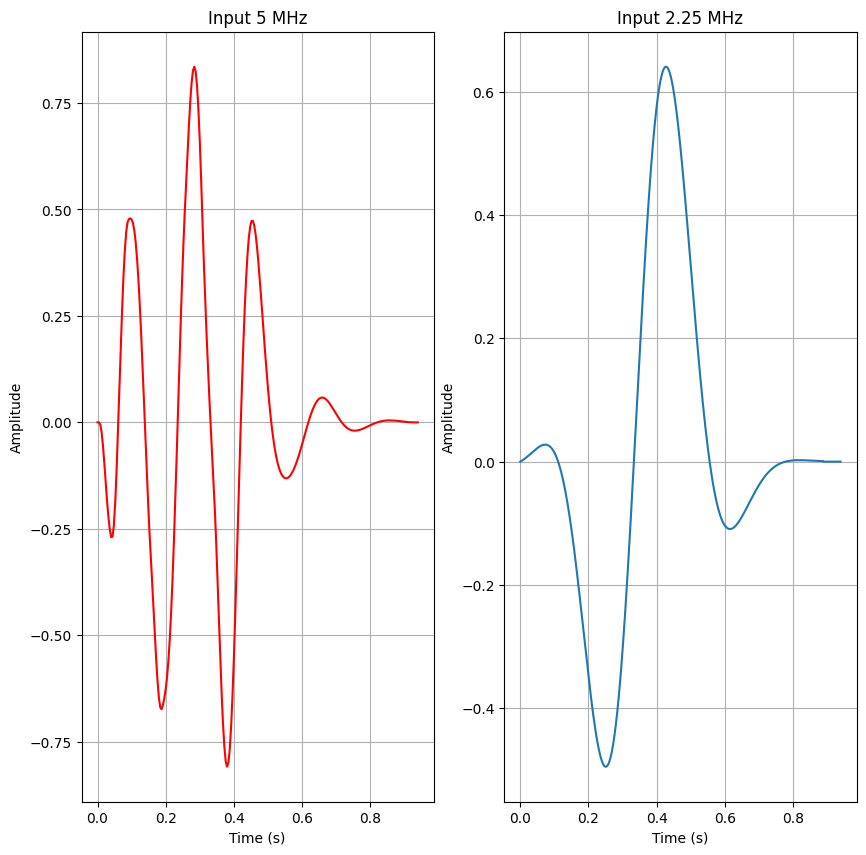